# GQP mock challenge baseline comparison 
We've all ran the baseline SED fitting for the mock challenge: 
- simulation: `Lgal`
- data: photometry + spectroscopy
- noise: `bgs0_legacy`
- method: `ispeculator`
- model: `emulator`

In this notebook we compare the posterior produced by each of the participants as a sanity check

In [1]:
import os
import h5py 
import numpy as np 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dir_mocha = '/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/'

In [4]:
def Fmcmc(igal, sim='lgal', data='specphoto', noise='bgs0_legacy', method='ispeculator', model='emulator', user='chang'): 
    ''' File name of MCMC output
    '''
    if user == 'chang': 
        subdir = ''
    elif user == 'james': 
        subdir = 'james/%s_0_96' % data
    else: 
        subdir = user
    fmcmc = os.path.join(dir_mocha, method, subdir, '%s.%s.noise_%s.%s.%i.mcmc.hdf5' % (sim, data, noise, model, igal))
    return fmcmc

In [5]:
ngal = 97

In [6]:
users =  np.array(['chang', 'james', 'mmezcua', 'gosia'])
for i in range(ngal):
    if np.any([not os.path.isfile(Fmcmc(i, user=user)) for user in users]): 
        print('%i missing: %s' % (i, users[np.array([not os.path.isfile(Fmcmc(i, user=user)) for user in users])]))

2 missing: ['mmezcua']
3 missing: ['mmezcua']
4 missing: ['mmezcua']
5 missing: ['mmezcua']
6 missing: ['mmezcua']
7 missing: ['mmezcua']
8 missing: ['mmezcua']
9 missing: ['mmezcua']
10 missing: ['mmezcua']
11 missing: ['mmezcua']
12 missing: ['mmezcua']
13 missing: ['mmezcua']
14 missing: ['mmezcua']
15 missing: ['mmezcua']
16 missing: ['mmezcua']
17 missing: ['mmezcua']
18 missing: ['mmezcua']
19 missing: ['chang' 'james' 'mmezcua' 'gosia']
20 missing: ['mmezcua']
21 missing: ['mmezcua']
22 missing: ['mmezcua']
23 missing: ['mmezcua']
24 missing: ['mmezcua' 'gosia']
25 missing: ['mmezcua']
26 missing: ['mmezcua']
27 missing: ['mmezcua']
28 missing: ['mmezcua']
29 missing: ['mmezcua']
30 missing: ['mmezcua']
31 missing: ['mmezcua']
32 missing: ['mmezcua']
33 missing: ['chang' 'james' 'mmezcua' 'gosia']
34 missing: ['mmezcua']
35 missing: ['mmezcua']
36 missing: ['mmezcua']
37 missing: ['mmezcua']
38 missing: ['james' 'mmezcua']
39 missing: ['mmezcua' 'gosia']
40 missing: ['mmezcua']


## Stellar masses comparison

In [9]:
user_chains = np.array([np.zeros((ngal, 3, 9)) for user in users]) # -1sig, median, 1sig for all the chains

for igal in range(ngal): 
    for i_user, user in enumerate(users): 
        f_mcmc = Fmcmc(igal, user=user)
        if not os.path.join(f_mcmc): 
            continue 
    
        try: 
            mc = h5py.File(f_mcmc, 'r')
        except OSError:
            continue
        _theta = np.percentile(mc['mcmc_chain'][...], [16, 50, 84], axis=0)

        user_chains[i_user,igal,:,:] = _theta

(9.0, 12.0)

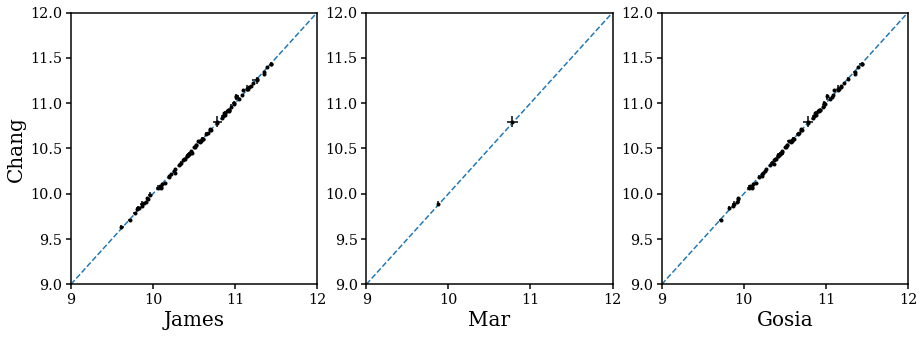

In [13]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.errorbar(user_chains[1,:,1,0], user_chains[0,:,1,0], 
             xerr=[user_chains[1,:,1,0] - user_chains[1,:,0,0], user_chains[1,:,2,0] - user_chains[1,:,1,0]], 
             yerr=[user_chains[0,:,1,0] - user_chains[0,:,0,0], user_chains[0,:,2,0]- user_chains[0,:,1,0]], fmt='.k')
sub.plot([9., 12.], [9., 12.], c='C0', ls='--')
sub.set_xlabel('James', fontsize=20)
sub.set_xlim(9., 12.)
sub.set_ylabel('Chang', fontsize=20)
sub.set_ylim(9., 12.)

sub = fig.add_subplot(132)
sub.errorbar(user_chains[2,:,1,0], user_chains[0,:,1,0], 
             xerr=[user_chains[2,:,1,0]- user_chains[2,:,0,0], user_chains[2,:,2,0]- user_chains[2,:,1,0]], 
             yerr=[user_chains[0,:,1,0] - user_chains[0,:,0,0], user_chains[0,:,2,0]- user_chains[0,:,1,0]], fmt='.k')
sub.plot([9., 12.], [9., 12.], c='C0', ls='--')
sub.set_xlabel('Mar', fontsize=20)
sub.set_xlim(9., 12.)
sub.set_ylim(9., 12.)

sub = fig.add_subplot(133)
sub.errorbar(user_chains[3,:,1,0], user_chains[0,:,1,0], 
             xerr=[user_chains[3,:,1,0] - user_chains[3,:,0,0], user_chains[3,:,2,0] - user_chains[3,:,1,0]], 
             yerr=[user_chains[0,:,1,0] - user_chains[0,:,0,0], user_chains[0,:,2,0]- user_chains[0,:,1,0]], fmt='.k')
sub.plot([9., 12.], [9., 12.], c='C0', ls='--')
sub.set_xlabel('Gosia', fontsize=20)
sub.set_xlim(9., 12.)
sub.set_ylim(9., 12.)

## $f_{\rm aperture}$ comparison

(0.0, 1.0)

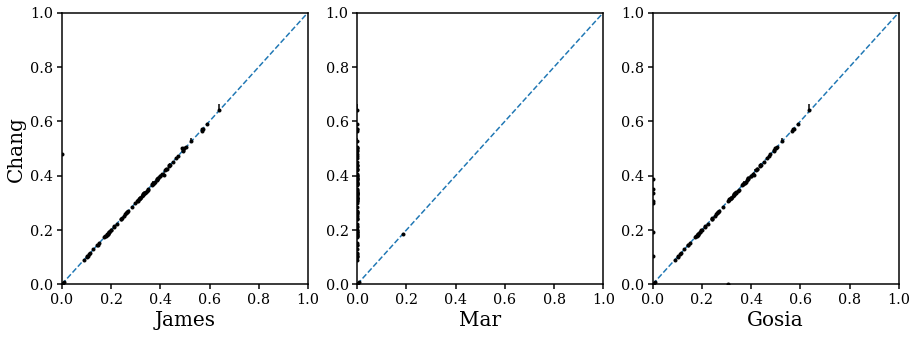

In [23]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.errorbar(user_chains[1,:,1,-1], user_chains[0,:,1,-1], 
             xerr=[user_chains[1,:,1,-1] - user_chains[1,:,0,-1], user_chains[1,:,2,-1] - user_chains[1,:,1,-1]], 
             yerr=[user_chains[0,:,1,-1] - user_chains[0,:,0,-1], user_chains[0,:,2,-1] - user_chains[0,:,1,-1]], fmt='.k')
sub.plot([0., 1.], [0., 1.], c='C0', ls='--')
sub.set_xlabel('James', fontsize=20)
sub.set_xlim(0., 1.)
sub.set_ylabel('Chang', fontsize=20)
sub.set_ylim(0., 1.)

sub = fig.add_subplot(132)
sub.errorbar(user_chains[2,:,1,-1], user_chains[0,:,1,-1], 
             xerr=[user_chains[2,:,1,-1] - user_chains[2,:,0,-1], user_chains[2,:,2,-1]- user_chains[2,:,1,-1]], 
             yerr=[user_chains[0,:,1,-1] - user_chains[0,:,0,-1], user_chains[0,:,2,-1]- user_chains[0,:,1,-1]], fmt='.k')
sub.plot([0., 1.], [0., 1.], c='C0', ls='--')
sub.set_xlabel('Mar', fontsize=20)
sub.set_xlim(0., 1.)
sub.set_ylim(0., 1.)

sub = fig.add_subplot(133)
sub.errorbar(user_chains[3,:,1,-1], user_chains[0,:,1,-1], 
             xerr=[user_chains[3,:,1,-1] - user_chains[3,:,0,-1], user_chains[3,:,2,-1] - user_chains[3,:,1,-1]], 
             yerr=[user_chains[0,:,1,-1] - user_chains[0,:,0,-1], user_chains[0,:,2,-1] - user_chains[0,:,1,-1]], fmt='.k')
sub.plot([0., 1.], [0., 1.], c='C0', ls='--')
sub.set_xlabel('Gosia', fontsize=20)
sub.set_xlim(0., 1.)
sub.set_ylim(0., 1.)